<a href="https://colab.research.google.com/github/JjKkhld/Pandas/blob/main/Companies_proj_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing libraries and data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

companies_data = pd.read_csv('/content/drive/MyDrive/DataFrames/Companies_project/Companies_clean.csv')

plt.style.use('ggplot')

companies_data.head(5)

,Company_name,Description,Ratings,Highly_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance",73100.0,856900.0,6100.0,847.0,11500.0
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",46400.0,584600.0,4300.0,9900.0,7100.0
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,41700.0,561500.0,3600.0,460.0,5800.0
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,39200.0,427400.0,3700.0,405.0,5000.0
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...",34000.0,414400.0,2800.0,719.0,4000.0


# 2. Looking at the 'Ratings'

There is names of all columns in a section below.

In [31]:
print("Names of columns: {}".format(companies_data.columns.values))

Names of columns: ['Company_name' 'Description' 'Ratings' 'Highly_rated_for' 'Total_reviews'
 'Avg_salary' 'Interviews_taken' 'Total_jobs_available' 'Total_benefits']


The column 'Ratings' is a key in our data.
Let's look on describe of 'Raitings'

In [32]:
ratings_stats = companies_data['Ratings'].describe()
ratings_stats

count    5607.000000
mean        3.852702
std         0.379011
min         1.600000
25%         3.600000
50%         3.900000
75%         4.100000
max         5.000000
Name: Ratings, dtype: float64

Ok, so we can see, that min value in 'Ratings' is 1.6 and max is 5. There is information about quantiles as well - 25% is 3.6, 50% is 3.9 and 75% is 4.1. The max value is 5. Let's group our data in 3 devision: 1st group has 1.6-3.5 points, 2nd group has 3.6-3.8 points, 3rd group has 3.9-4.0 and last one has 4.1-5.0 points.  

In [33]:
pd.options.mode.copy_on_write = True

companies_copy = companies_data[['Company_name', 'Ratings']]

def making_groups(row):
  if row < ratings_stats['25%']:
    return 1
  elif row < ratings_stats['50%'] and row >= ratings_stats['25%']:
    return 2
  elif row < ratings_stats['75%'] and row >= ratings_stats['50%']:
    return 3
  else:
    return 4


companies_copy['Group'] = companies_copy['Ratings'].apply(making_groups)
companies_copy.head(3)

,Company_name,Ratings,Group
0,TCS,3.8,2
1,Accenture,4.0,3
2,Cognizant,3.9,3


In [34]:
companies_copy['Group'].value_counts()

Group
4    1784
2    1424
3    1301
1    1098
Name: count, dtype: int64

So we have a copy of dataframe with a column 'Group'. Let's create histogram with this data.

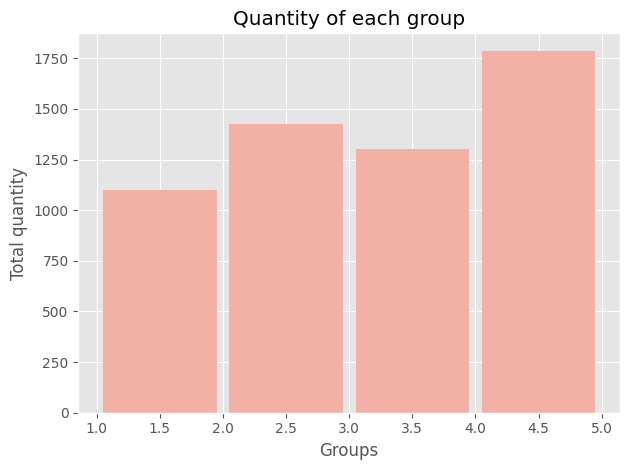

In [35]:
bins = [1, 2, 3, 4, 5]

plt.hist(companies_copy['Group'], bins=bins, rwidth=.9, range=[1, 4], align='mid',
         color='#F3B1A5')

plt.title('Quantity of each group')
plt.xlabel('Groups')
plt.ylabel('Total quantity')

plt.tight_layout()

As we can see the most quantity group is companies wich have 4.1 and more point of rating.

Let's make histogram of 'Ratings' and crate a line of distribution order to make sure about the above information.


<Axes: xlabel='Ratings', ylabel='Count'>

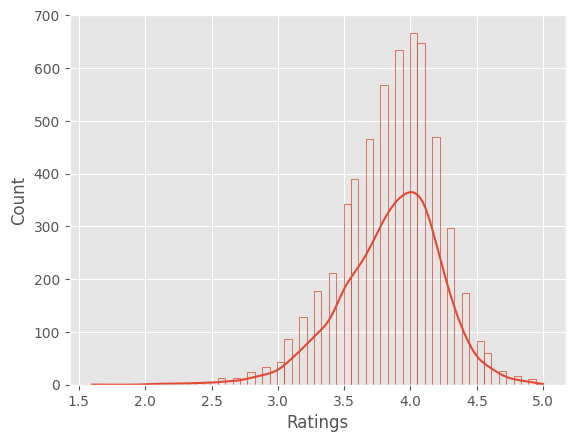

In [36]:
# sns.set_context(font_scale=1)
sns.histplot(companies_data['Ratings'], kde=True, log_scale=False, fill=False)

In [37]:
print("Skewness: {}".format(companies_data['Ratings'].skew()))
print("Kurtosis: {}".format(companies_data['Ratings'].kurt()))

Skewness: -0.6441670285880557
Kurtosis: 1.2688281467832567


# 3. Searching of a correlation with the numerical columns

Let's make a correlation matrix

In [38]:
companies_data.columns

Index(['Company_name', 'Description', 'Ratings', 'Highly_rated_for',
       'Total_reviews', 'Avg_salary', 'Interviews_taken',
       'Total_jobs_available', 'Total_benefits'],
      dtype='object')

<Axes: >

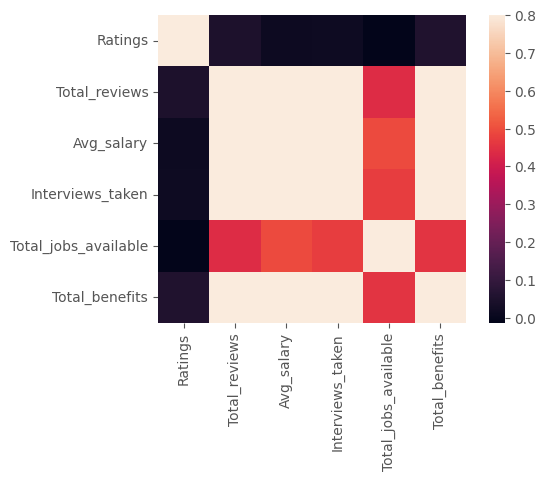

In [39]:
corrmat = companies_data[['Ratings', 'Total_reviews', 'Avg_salary', 'Interviews_taken',
       'Total_jobs_available', 'Total_benefits']].corr()
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corrmat, vmax=.8, square=True)

As we can see, the correlation with any numerical column is weak. But corr between 'Ratings'<->'Total_reviews' and 'Ratings'<->'Total_benefits' looks more correlated. Let's modify the data to getting know if there is correlation between 'Ratings' <-> all other num columns.

In [40]:
columns_to_proc = ['Total_reviews', 'Avg_salary', 'Interviews_taken',
                   'Total_jobs_available', 'Total_benefits']

companies_copy = companies_data[columns_to_proc].apply(lambda x: x / 1000)
companies_copy['Sum'] = companies_copy[columns_to_proc].sum(axis=1)

companies_copy_final = pd.concat([companies_data['Ratings'], companies_copy['Sum']],
                                 axis=1)

companies_copy_final.corr()

,Ratings,Sum
Ratings,1.000000,0.017075
Sum,0.017075,1.000000


As we can see, there is no correlation between 'Ratings' and other num columns. Next what we should do is analize non-num columns

# 4. Searching of a correlation with the non-numerical columns

The non-numerical columns which are intersting for us are 'Highly_rated_for	' and 'Description'. I'm going to split each row in there columns order to make some analize. Let's start with the first one.

In [54]:
all_rating_areas = companies_data['Highly_rated_for'].apply(lambda rows: str(rows).split(',')).sum()

In [55]:
all_rating_areas = list(dict.fromkeys(all_rating_areas))

In [56]:
all_rating_areas = [i.lstrip() if ' ' in i else i for i in all_rating_areas]

all_rating_areas = list(dict.fromkeys(all_rating_areas))

In [57]:
all_rating_areas

['Job Security',
 'Work Life Balance',
 'Company Culture',
 'Skill Development / Learning',
 'Promotions / Appraisal',
 'Salary & Benefits',
 'Work Satisfaction']

In [58]:
lst_count=[]
lst_per = []
all = companies_data['Highly_rated_for'].count()
for i in all_rating_areas:
  specify = companies_data['Highly_rated_for'].apply(lambda x: i in x if isinstance(x, str) else False).sum()
  lst_count.append(specify)
  res = round(specify / all * 100, 2)
  lst_per.append(res)

ser_count = pd.Series(lst_count)
ser_per = pd.Series(lst_per)
ser_areas = pd.Series(all_rating_areas)

data_areas = pd.concat([ser_areas, ser_count, ser_per], axis=1,
                       keys=['Areas' ,'Number of companies', 'Percenteges']).sort_values(by='Number of companies', ascending=False)

Let's make bar chart with this data

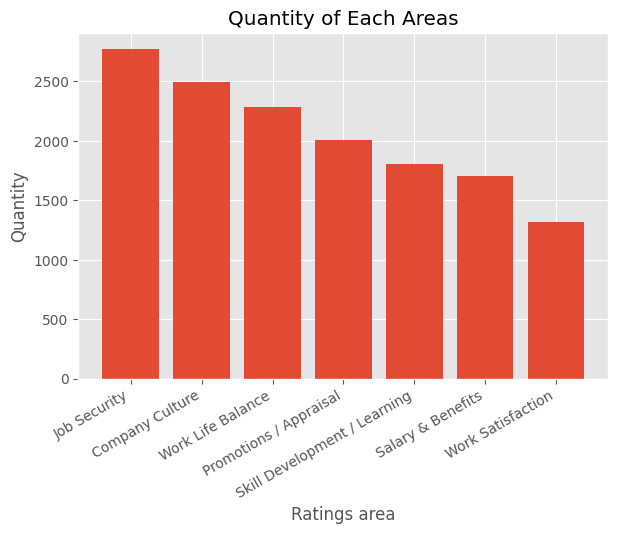

In [59]:
plt.bar(data_areas['Areas'] ,data_areas['Number of companies'])

plt.title('Quantity of Each Areas')
plt.xlabel('Ratings area')
plt.ylabel('Quantity')

plt.tight_layout()
plt.gcf().autofmt_xdate()

Now let's make dataframe

In [60]:
means_of_areas = []

for i in all_rating_areas:
  filt = companies_data['Highly_rated_for'].str.contains(i)
  mean = companies_data.loc[filt, 'Ratings'].mean()
  means_of_areas.append(round(mean, 2))

data_mean_of_rat = pd.DataFrame(means_of_areas, index=all_rating_areas, columns=['Ratings'])
data_mean_of_rat = data_mean_of_rat.sort_values(by='Ratings', ascending=False)

plots for ratings areas

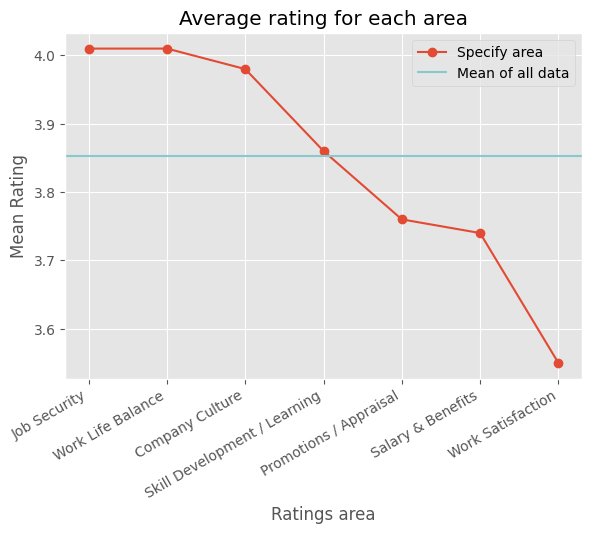

In [61]:
plt.plot(all_rating_areas, data_mean_of_rat['Ratings'], label='Specify area',
         marker='o')
plt.axhline(companies_data['Ratings'].mean(), color='#87C9CD', label='Mean of all data')

plt.title('Average rating for each area')
plt.xlabel('Ratings area')
plt.ylabel('Mean Rating')
plt.legend()

plt.tight_layout()
plt.gcf().autofmt_xdate()

As we can see, all opinions which highly rated for Job Security, Work Life Balance, Company Culture and Skill Dev/Learning have higher mean rate than the mean of all rates.

Let's do this for 'Description'

In [62]:
# split row
all_descr = companies_data['Description'].apply(lambda rows: str(rows).split(' | '))

# finding out of specialise of each company
specialises = []
for item in all_descr:
  specialises.append(item[0])

# deleting duplicates
specialises = list(dict.fromkeys(specialises))

# removing of extra data
nums_to_remove = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

for num in nums_to_remove:
  for i in specialises:
    if num in i:
      specialises.remove(i)

specialises.sort()

In [63]:
lst_count=[]
lst_per = []

all = companies_data['Description'].count()
for i in specialises:
  specify = companies_data['Description'].apply(lambda x: i in x if isinstance(x, str) else False).sum()
  lst_count.append(specify)
  res = round(specify / all * 100, 2)
  lst_per.append(res)

ser_count = pd.Series(lst_count)
ser_per = pd.Series(lst_per)
ser_spec = pd.Series(specialises)

data_spec_numbers = pd.concat([ser_spec, ser_count, ser_per], axis=1,
                       keys=['Specialises' ,'Number of companies', 'Percenteges']).sort_values(by='Number of companies', ascending=False)

data_spec_numbers.reset_index(drop=True, inplace=True)

In [64]:
means_of_spec = []

for i in specialises:
  filt = companies_data['Description'].str.contains(i)
  mean = companies_data.loc[filt, 'Ratings'].mean()
  means_of_spec.append(round(mean, 2))

data_mean_of_spec = pd.DataFrame(means_of_spec, columns=['Mean of rating'])
# data_mean_of_spec = data_mean_of_spec.sort_values(by='Ratings', ascending=False)

data_spec = pd.concat([data_spec_numbers, data_mean_of_spec], axis=1)
data_spec

,Specialises,Number of companies,Percenteges,Mean of rating
0,IT Services & Consulting,986,17.59,3.71
1,Startup,303,5.40,3.81
2,Pharma,209,3.73,4.03
3,Software Product,207,3.69,3.90
4,Internet,204,3.64,3.73
...,...,...,...,...
80,Urban Transport,6,0.11,3.67
81,Content Development,4,0.07,3.93
82,Leather,2,0.04,3.92
83,Sports & Recreation,2,0.04,3.83


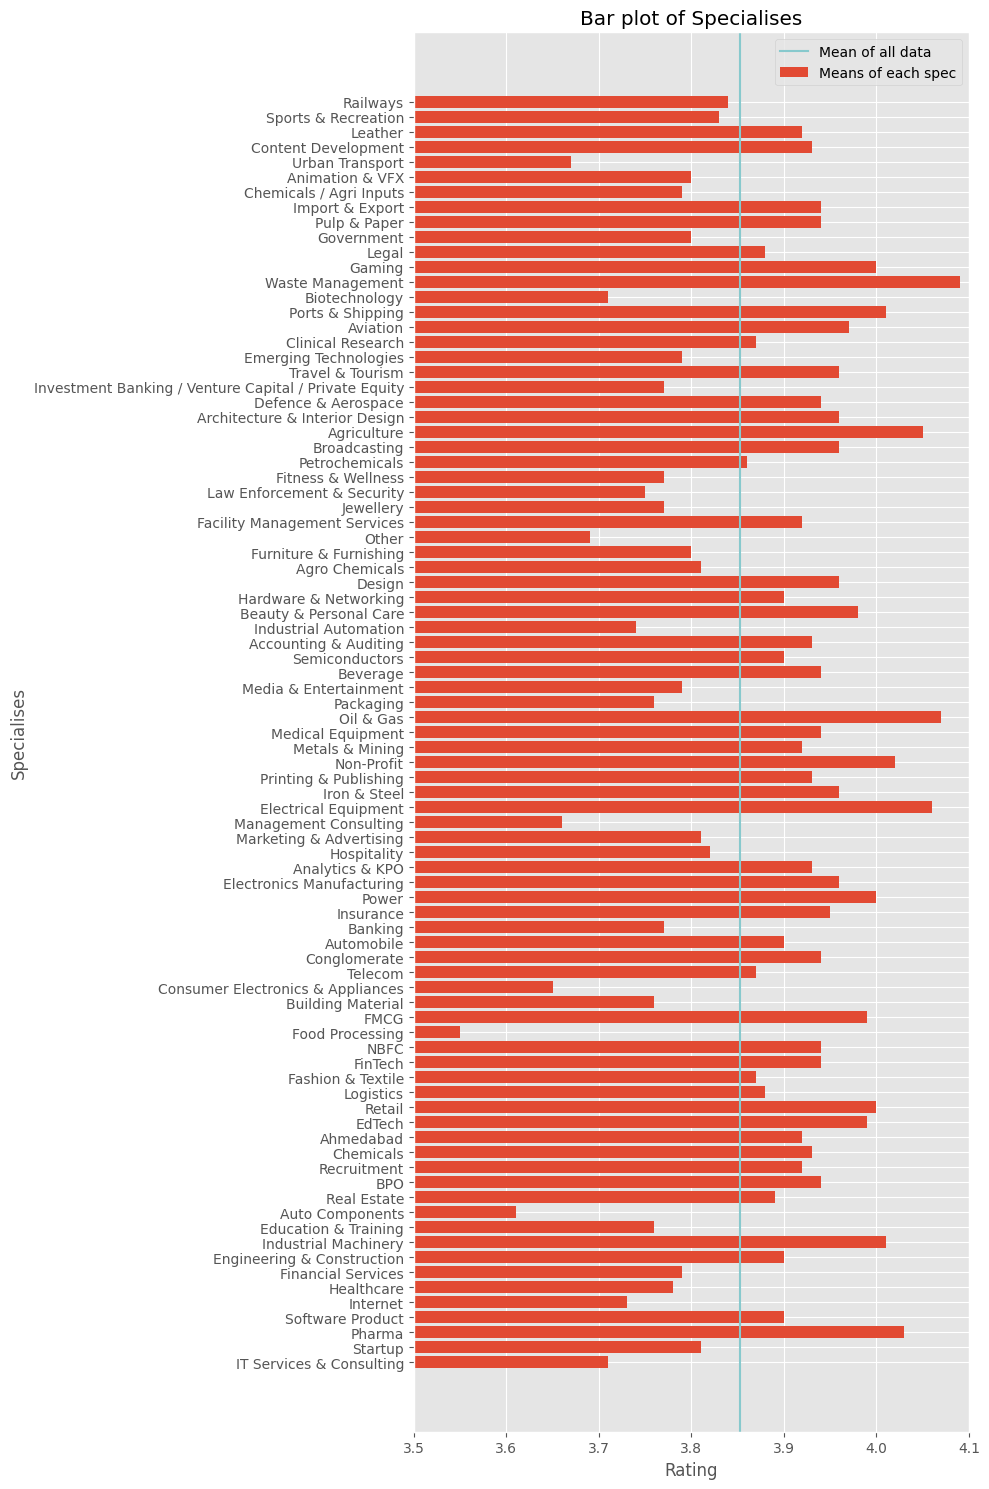

In [68]:
plt.figure(figsize=(10, 15))

plt.barh(data_spec['Specialises'], data_spec['Mean of rating'], label='Means of each spec')
plt.axvline(companies_data['Ratings'].mean(), color='#87C9CD', label='Mean of all data')

plt.xlim([3.5, 4.1])

plt.title('Bar plot of Specialises')
plt.xlabel('Rating')
plt.ylabel('Specialises')

plt.legend()
plt.tight_layout()